In [589]:
import xarray as xr

In [590]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [591]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter, cdic_model
log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

In [592]:
    from IPython import get_ipython

    # noinspection PyBroadException
    try:
        _ipython = get_ipython()
        _magic = _ipython.magic
        _magic('load_ext autoreload')
        _magic('autoreload 2')
    except:
        pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [593]:
cdic_model

{'NorESM': '#d8651e',
 'ECHAM-SALSA': '#0476b2',
 'EC-Earth': '#e6a01c',
 'UKESM': '#2a9e76',
 'Observations': 'k'}

In [594]:
plot_path = Path('Plots')

In [595]:
def make_fn_eval(case,_type):
    #_x = v_x.split('(')[0]
    #_y = v_y.split('(')[0]
    f = f'evalOA_echam_{case}_{_type}.png'
    return plot_path /f

In [596]:
plot_path.mkdir(exist_ok=True, parents=True)

## EBAS OA timeseries:

In [597]:
    download_link= 'http://ebas-data.nilu.no/DataSets.aspx?stations=FI0050R&InstrumentTypes=aerosol_mass_spectrometer&fromDate=1970-01-01&toDate=2021-12-31'

## Read in model data. 

In [598]:
model_lev_i=-1

In [599]:
models = ['ECHAM-SALSA','NorESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

In [600]:
from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

In [601]:
import seaborn as sns
import matplotlib.pyplot as plt

In [602]:
import numpy as np

In [603]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [604]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [605]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [606]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

### LOAD ECHAM SALSA

## Settings:

In [607]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [608]:



case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
from_time = '2012-01'
to_time = '2012-02'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

In [609]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-09-02 11:08:34,280 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


2022-09-02 11:08:34,280 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


## Variables

In [610]:
varl =[
      'apm',
'geom',
'airdens',
'tempair',
'uw',
'vw',
'ccn02',
'ccn10',
'cod',
'cwp',
'ceff',
'ceff_ct',
'lcdnc',
'lcdnc_ct',
'clfr',
'cl_time',
'aot550nm',
'aot865nm',
'ang550865',
'up_sw',
'up_sw_cs',
'up_sw_noa',
'up_sw_cs_noa',
'up_lw',
'up_lw_cs',
'up_lw_noa',
'up_lw_cs_noa',
'mmrtrN500',
'mmrtrN250',
'mmrtrN200',
'mmrtrN100',
'mmrtrN50',
'mmrtrN3',
'oh_con',
'emi_monot_bio',
'emi_isop_bio',
'SO2_gas',
'APIN_gas',
'TBETAOCI_gas',
'BPIN_gas',
'LIMON_gas',
'SABIN_gas',
'MYRC_gas',
'CARENE3_gas',
'ISOP_gas',
'VBS0_gas',
'VBS1_gas',
'VBS10_gas',
'ORG_mass',
] 

In [611]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [612]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-09-02 11:08:34,437 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [613]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

## LOAD NORESM

## Settings:

In [614]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [615]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [616]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [617]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [618]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

## Variables

In [619]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [620]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [621]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [622]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-09-02 11:08:36,427 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [623]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-09-02 11:08:37,192 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [624]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [625]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [626]:
dic_ds = {case_mod: ds_comb}

In [627]:
dic_mod_ca['NorESM'] = dic_ds.copy()

In [628]:
ds_comb

<xarray.Dataset>
Dimensions:     (time: 61345, station: 7, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station     (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/39)
    ACTREL      (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    ...          ...
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    isoprene    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    monoterp    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>

## Adjustments ECHAM-SALSA:

In [629]:
_ds = dic_mod_ca['ECHAM-SALSA'][case_name_echam]
_ds['monoterp'] = _ds['APIN_gas'] + _ds['BPIN_gas'] + _ds['CARENE3_gas']+_ds['SABIN_gas'] + _ds['LIMON_gas'] + _ds['MYRC_gas'] + _ds['TBETAOCI_gas'] 
dic_mod_ca['ECHAM-SALSA'][case_name_echam] = _ds

In [630]:
rn_dict_echam={
    'emi_monot_bio': 'SFmonoterp',
    'emi_isop_bio': 'SFisoprene',
    'ISOP_gas':'isoprene',


    
}

In [631]:
rn_dict_echam2={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',


    
}

In [632]:
standard_air_density = 100*pressure/(R*temperature)

In [633]:


model_name_echam_salsa = 'ECHAM-SALSA'

for key in dic_mod_ca[model_name_echam_salsa]:
    _ds = dic_mod_ca[model_name_echam_salsa][key]
    _ds = _ds.rename_vars(rn_dict_echam)
    dic_mod_ca[model_name_echam_salsa][key] = _ds

## SELECT STATION:


In [634]:
stations = ['SMR','ATTO'] 

In [635]:
dict_stations = dict()
for station in stations: 
    print(station)
    dict_stations[station] =dict()
    for mod in dic_mod_ca.keys():
        #dict_stations[station][mod] = dict()
        ca = list(dic_mod_ca[mod].keys())[0]
        _ds = dic_mod_ca[mod][ca].sel(station=station)
        _ds.load()
        dict_stations[station][mod]= _ds.copy()
    #dict_stations[station] = dic_mod_ca.copy()

SMR
ATTO


In [636]:
dict_stations_df = dict()

# Functions:

In [637]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

standard_air_density = 100*pressure/(R*temperature)

## ADJUST ECHAM

In [638]:
import datetime

In [639]:
def fix_echam_time(dt):
    #a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(minutes=dt.minute, seconds = dt.second)
    #nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year, dt.month,dt.day, dt.hour)#dt - tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt

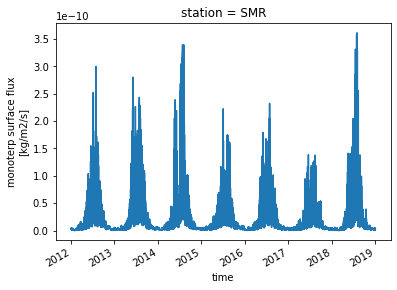

In [640]:
dict_stations['SMR'][mod]['SFmonoterp'].plot()

In [641]:
dict_stations_df = dict()
for station in stations: 
    dict_stations_df[station] = dict()
    #for mod in dic_mod_ca.keys():
    mod = 'ECHAM-SALSA'
    _df_in = dict_stations[station][mod]#[case_name_echam]
    df, df_sm = ds2df_echam(_df_in, take_daily_median=False, model_lev_i =model_lev_i,summer_months=np.arange(1,13),)
    df.index = df.reset_index()['time'].apply(fix_echam_time)
    dict_stations_df[station][mod] = df
    mod = 'NorESM'
    _dic_in = {case_noresm:dict_stations[station][mod]}
    dic_df = ds2df_inc_preprocessing(_dic_in, model_lev_i=model_lev_i, summer_months=np.arange(1,13),
                                            return_summer_median=False, take_daily_median=False)
    dict_stations_df[station][mod] = dic_df[case_noresm]
    for mod in  dict_stations_df[station].keys():
        _df = dict_stations_df[station][mod]
        ind = _df.index
        
        dict_stations_df[station][mod].index = ind + datetime.timedelta(hours=3)

N3
N50
N100
N200
N250
N500
ORG_mass_conc
VBS1_gas_conc
VBS0_gas_conc
VBS10_gas_conc
cwp
hey
<xarray.Dataset>
Dimensions:     (time: 61345, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station     <U3 'SMR'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/39)
    ACTREL      (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    BC_A        (time, lev) float32 4.068e-13 2.567e-13 ... 1.212e-11 1.141e-11
    BC_AC       (time, lev) float32 2.354e-17 1.01e-17 ... 3.25e-13 4.377e-14
    BC_AI       (time, lev) float32 3.951e-18 1.75e-18 ... 7.688e-13 7.346e-13
    BC_AX       (time, lev) float32 3.118e-14 1.945e-14 ... 1.967e-12 1.709e-12
    BC_N        (time, lev) float32 4.131e-14 2.532e-14 ... 1.052e-11 7.518e-12
    ...          ...
    SS_A1       (time, lev) float32 1.795e-23 1.613e-22 ... 1.355e-11 1.773e-12
    SS_A2       (time, lev) float32 1.167e-25 1.021e-25 ... 7.13e-11 9.3

<AxesSubplot:xlabel='time'>

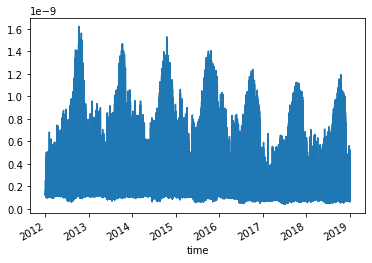

In [642]:
dict_stations_df[station][mod]['SFmonoterp'].plot()

<AxesSubplot:xlabel='time'>

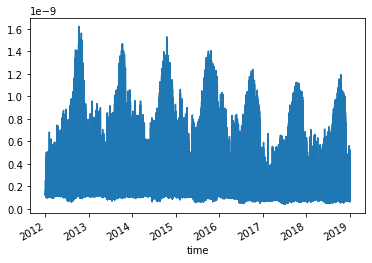

In [643]:
dict_stations_df[station]['NorESM']['SFmonoterp'].plot()

In [644]:
vars_to_dtframe = ['OA','SFmonoterp','SFisoprene', 'isoprene', 'SFmonoterp', 'monoterp']

In [645]:
dict_stations_var2df = dict()
for station in stations: 

    #dict_stations_var2df[station] = dict()

    for v in vars_to_dtframe:
        _df_all = pd.DataFrame()
        for mod in dict_stations_df[station].keys():
            _df = dict_stations_df[station][mod]
            print(mod)
            _df_all[mod] = _df[v]
        
        dict_stations_var2df[station] = _df_all.copy()

ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM


## SHIFT TIME:

In [646]:
import datetime

## Settings:

In [647]:
from bs_fdbck.constants import path_measurement_data
import pandas as pd

## Set uo dic with all OA values from models

Small error due to time change in models but only 3 data points each summer. 


In [648]:
orgname={'NorESM' : 'OA',
         'ECHAM-SALSA': 'OA'}

### Calculate anomaly from daily average

In [649]:
linestyle_dic = {
    'Obs': '--',
    'NorESM':'dashdot',
    'ECHAM-SALSA':'-.'
}

In [650]:
def make_cbar(fig, label):
    

    levs = [1000]+[np.round(dic_p[i]) for i in range(1,num_levs)] + [850]

    levs_bound = [(levs[i]+levs[i+1])/2 for i in np.arange(len(levs)-1)]

    lev_ticks = levs[1:-1][::-1]

    cmap= mpl.colors.ListedColormap(sns.color_palette('viridis_r',6))
    norm= mpl.colors.BoundaryNorm(levs_bound[::-1], len(levs_bound[::-1]))#, clip=True)

    #norm = mpl.colors.Normalize(vmin=993,vmax=886)
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmap), ticks = lev_ticks, label=label)
    #cb.ax.set_yticklabels(levs[::-1][:-1])
    cb.ax.invert_yaxis()



In [651]:
def make_cbar(fig, label):
    
    levs = [992.556095123291,
     976.325407391414,
     957.485479535535,
     936.1983984708786,
     912.644546944648,
     887.0202489197254]

    aa = [levs[0]+(levs[0]-levs[1])/2]
    for i in range(len(levs)-1):
        b = (levs[i] + levs[i+1])/2
        aa.append(b)

    aa.append( levs[-1]+(levs[-1]-levs[-2])/2   )

    a1 = aa[0]
    a2 = aa[-1]
    
    
    cmap = plt.get_cmap('plasma_r')

    norm = mpl.colors.Normalize(vmin=a2,vmax=a1)

    cols = [cmap(norm(min(levs, key=lambda x:abs(x-xx)))) for xx in np.linspace(a2,a1,256)]

    cmm = mpl.colors.ListedColormap(cols)
    

    #norm = mpl.colors.Normalize(vmin=993,vmax=886)
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmm), ticks = levs, label=label)
    #cb.ax.set_yticklabels(levs[::-1][:-1])
    cb.ax.invert_yaxis()
    
    return norm, cmm

In [652]:
import matplotlib as mpl

In [653]:
_bins = np.logspace(-11,-9)

In [678]:
station ='SMR'

<AxesSubplot:xlabel='time'>

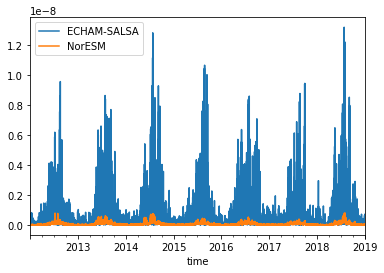

In [679]:
dict_stations_var2df[station].plot()

In [680]:
months = [7,8]

Plots/evalOA_echam_noresm_echam_hist.png


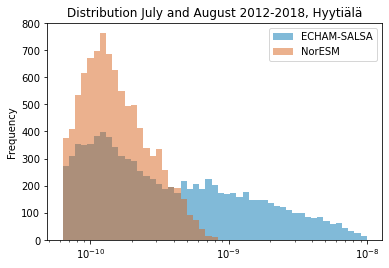

In [681]:
station ='SMR'
v = 'SFmonoterp'
_df = dict_stations_var2df[station]#dic_var2df[v]
_df =_df[_df.index.month.isin(months)]#dic_var2df[v]

for mo in models:
    _df[mo].plot.hist(bins=_bins, 
                      alpha=0.5, 
                                     #color=None,
                            #color = cdi
                            color = cdic_model[mo],
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

#plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title('Distribution July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('noresm_echam','hist')
#plt.savefig(fn, dpi=300)
#plt.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn) 

Plots/evalOA_echam_noresm_echam_hist.png


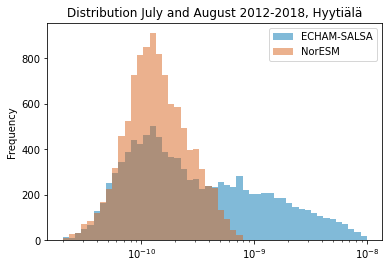

In [682]:
_bins = np.logspace(-10.7,-8)

v = 'monoterp'
_df = dict_stations_var2df[station]#dic_var2df[v]
_df =_df[_df.index.month.isin(months)]#dic_var2df[v]

for mo in models:
    _df[mo].plot.hist(bins=_bins, 
                      alpha=0.5, 
                                     #color=None,
                            #color = cdi
                            color = cdic_model[mo],
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

#plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title('Distribution July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('noresm_echam','hist')
#plt.savefig(fn, dpi=300)
#plt.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn) 

Plots/evalOA_echam_noresm_echam_hist.png


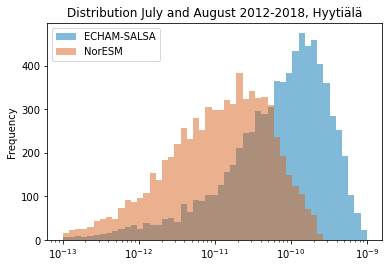

In [683]:
_bins = np.logspace(-13,-9)

v = 'SFisoprene'
_df = dic_var2df[v]
_df =_df[_df.index.month.isin(months)]#dic_var2df[v]

for mo in models:
    _df[mo].plot.hist(bins=_bins, 
                      alpha=0.5, 
                                     #color=None,
                            #color = cdi
                            color = cdic_model[mo],
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

#plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title('Distribution July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('noresm_echam','hist')
#plt.savefig(fn, dpi=300)
#plt.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn) 

Plots/evalOA_echam_noresm_echam_hist.png


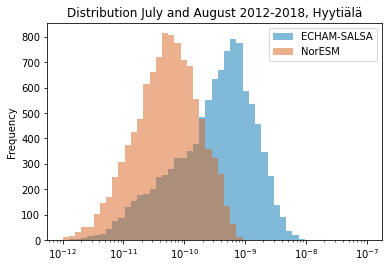

In [684]:
_bins = np.logspace(-12,-7)

v = 'isoprene'
_df = dic_var2df[v]
_df =_df[_df.index.month.isin(months)]#dic_var2df[v]

for mo in models:
    _df[mo].plot.hist(bins=_bins, 
                      alpha=0.5, 
                                     #color=None,
                            #color = cdi
                            color = cdic_model[mo],
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

#plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title('Distribution July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('noresm_echam','hist')
#plt.savefig(fn, dpi=300)
#plt.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn) 

## ATTO

In [535]:
station ='ATTO'

In [670]:
months = [12,1,2,3]

Plots/evalOA_echam_noresm_echam_hist.png


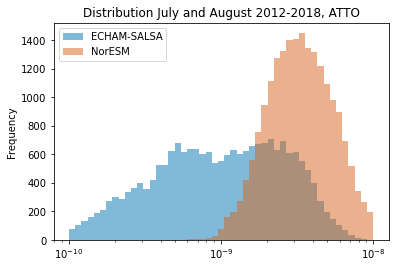

In [674]:
_bins = np.logspace(-10,-8)

station ='ATTO'
v = 'SFmonoterp'
_df = dict_stations_var2df[station]#dic_var2df[v]
_df =_df[_df.index.month.isin(months)]#dic_var2df[v]

for mo in models:
    _df[mo].plot.hist(bins=_bins, 
                      alpha=0.5, 
                                     #color=None,
                            #color = cdi
                            color = cdic_model[mo],
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

#plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title(f'Distribution July and August 2012-2018, {station}')

plt.legend()
fn = make_fn_eval('noresm_echam','hist')
#plt.savefig(fn, dpi=300)
#plt.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn) 

Plots/evalOA_echam_noresm_echam_hist.png


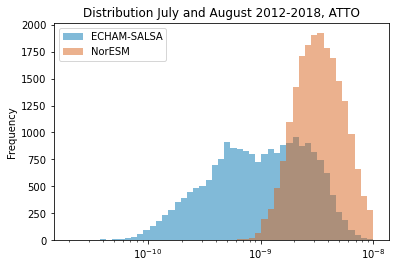

In [675]:
_bins = np.logspace(-10.7,-8)

v = 'monoterp'
_df = dic_var2df[v]
_df = dict_stations_var2df[station]#dic_var2df[v]
_df =_df[_df.index.month.isin(months)]#dic_var2df[v]

for mo in models:
    _df[mo].plot.hist(bins=_bins, 
                      alpha=0.5, 
                                     #color=None,
                            #color = cdi
                            color = cdic_model[mo],
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

#plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title(f'Distribution July and August 2012-2018, {station}')

plt.legend()
fn = make_fn_eval('noresm_echam','hist')
#plt.savefig(fn, dpi=300)
#plt.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn) 

Plots/evalOA_echam_noresm_echam_hist.png


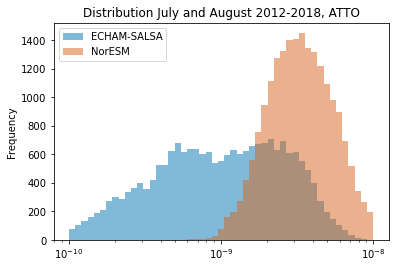

In [676]:
_bins = np.logspace(-10,-8)

v = 'SFisoprene'
_df = dic_var2df[v]
_df = dict_stations_var2df[station]#dic_var2df[v]
_df =_df[_df.index.month.isin(months)]#dic_var2df[v]

for mo in models:
    _df[mo].plot.hist(bins=_bins, 
                      alpha=0.5, 
                                     #color=None,
                            #color = cdi
                            color = cdic_model[mo],
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

#plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title(f'Distribution July and August 2012-2018, {station}')

plt.legend()
fn = make_fn_eval('noresm_echam','hist')
#plt.savefig(fn, dpi=300)
#plt.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn) 

Plots/evalOA_echam_noresm_echam_hist.png


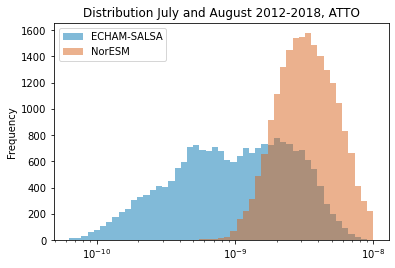

In [677]:
_bins = np.logspace(-10.2,-8)

v = 'isoprene'
#_df = dic_var2df[v]
_df = dict_stations_var2df[station]#dic_var2df[v]
_df =_df[_df.index.month.isin(months)]#dic_var2df[v]

for mo in models:
    _df[mo].plot.hist(bins=_bins, 
                      alpha=0.5, 
                                     #color=None,
                            #color = cdi
                            color = cdic_model[mo],
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

#plt.xlabel('OA [$\mu$gm$^{-3}$]')

plt.title(f'Distribution July and August 2012-2018, {station}')


plt.legend()
fn = make_fn_eval('noresm_echam','hist')
#plt.savefig(fn, dpi=300)
#plt.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn) 

In [ ]:
v